# Pasos iniciales

Lo primero que debemos hacer es cargar los imports necesarios y cargar los datos que vamos a utilizar.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)

ruta_datos = "../data/Datos Lab 1.csv"
ruta_dicc  = "../data/DiccPacientes.xlsx"

def cargar_csv(ruta):

    try:
        df = pd.read_csv(ruta)
        # Si quedó en 1 columna, seguramente era ';'
        if df.shape[1] == 1:
            df = pd.read_csv(ruta, sep=";")
    except Exception:
        df = pd.read_csv(ruta, sep=";")
    return df

# =========================
datos = cargar_csv(ruta_datos)
datos.columns = datos.columns.str.strip()

print("Datos (total):", datos.shape)
display(datos.head())

dicc = pd.read_excel(ruta_dicc)
dicc.columns = dicc.columns.str.strip()

print("Diccionario:", dicc.shape)
display(dicc.head(20))

Datos (total): (1639, 24)


,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,77.0,91.0,Y,Y,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,71.0,76.0,N,Y,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,60.0,150.0,N,N,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,34.0,111.0,Y,N,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,49.0,147.0,Y,Y,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH


Diccionario: (24, 3)


,Nombre Columna,Tipo de dato,Comentarios
0,Patient ID,String,Identificador del paciente
1,Date of Service,Date,Fecha de la atención
2,Sex,String,"Sexo (Femenino, Masculino)"
3,Age,Integer,Edad
4,Weight (kg),Float,Peso
5,Height (m),Float,Altura
6,BMI,Float,Índice de masa corporal
7,Abdominal Circumference (cm),Float,Circunferencia abdominal
8,Blood Pressure (mmHg),String,"Presión sanguínea, de la forma ""<Presión arter..."
9,Total Cholesterol (mg/dL),Float,Colesterol total


In [24]:
from sklearn.model_selection import train_test_split

objetivo = "CVD Risk Score"

# quitar filas sin objetivo
datos = datos.dropna(subset=[objetivo]).copy()

# (opcional recomendado) parsear fecha si existe
if "Date of Service" in datos.columns:
    datos["Date of Service"] = pd.to_datetime(datos["Date of Service"], errors="coerce")

# X / y (sin archivo test)
columnas_a_excluir = [objetivo, "CVD Risk Level", "Patient ID", "Date of Service", "Blood Pressure (mmHg)", "Height (cm)"]
X = datos.drop(columns=columnas_a_excluir, errors="ignore").copy()
y = datos[objetivo].copy()

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_entrenamiento.shape, y_entrenamiento.shape)
print("Test: ", X_prueba.shape, y_prueba.shape)

Train: (1288, 18) (1288,)
Test:  (322, 18) (322,)


## 1. Exploración y perfilamiento de los datos (10%)

**Objetivo:** comprender la estructura del dataset, calidad (faltantes/duplicados), tipos de variables y distribución de la variable objetivo (**CVD Risk Score**).  
Este análisis guiará las decisiones de preparación e ingeniería de características.

In [25]:

print("Shape del dataset:", datos.shape)
print("\n--- Tipos de datos ---")
display(datos.dtypes)

print("\n--- Valores faltantes ---")
faltantes = datos.isna().sum().sort_values(ascending=False)
display(faltantes[faltantes > 0])

print("\n--- Descripción estadística ---")
display(datos.describe(include="all").T)

print("\n--- Columnas categóricas ---")
categoricas = datos.select_dtypes(include=["object"]).columns.tolist()
print(categoricas)

print("\n--- Cardinalidad categóricas ---")
for col in categoricas:
    print(f"{col}: {datos[col].nunique()} valores únicos")

print("\n--- Columnas numéricas ---")
numericas = datos.select_dtypes(include=np.number).columns.tolist()
print(numericas)

Shape del dataset: (1610, 24)

--- Tipos de datos ---


Patient ID                                 str
Date of Service                 datetime64[us]
Sex                                        str
Age                                    float64
Weight (kg)                            float64
Height (m)                             float64
BMI                                    float64
Abdominal Circumference (cm)           float64
Blood Pressure (mmHg)                      str
Total Cholesterol (mg/dL)              float64
HDL (mg/dL)                            float64
Fasting Blood Sugar (mg/dL)            float64
Smoking Status                             str
Diabetes Status                            str
Physical Activity Level                    str
Family History of CVD                      str
Height (cm)                            float64
Waist-to-Height Ratio                  float64
Systolic BP                            float64
Diastolic BP                           float64
Blood Pressure Category                    str
Estimated LDL


--- Valores faltantes ---


Date of Service                 1275
Diastolic BP                      83
HDL (mg/dL)                       82
Waist-to-Height Ratio             76
Weight (kg)                       72
Height (cm)                       68
Total Cholesterol (mg/dL)         68
Age                               67
Systolic BP                       60
Height (m)                        60
Abdominal Circumference (cm)      59
Estimated LDL (mg/dL)             57
Fasting Blood Sugar (mg/dL)       53
BMI                               51
dtype: int64


--- Descripción estadística ---


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Patient ID,1610,1349,oSqq7069,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Service,335,NaN,NaN,NaN,2023-01-15 17:33:08.059701,2020-01-05 00:00:00,2021-06-28 00:00:00,2022-12-26 00:00:00,2024-08-05 00:00:00,2025-12-26 00:00:00,NaN
Sex,1610,2,M,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1543.0,NaN,NaN,NaN,46.769697,6.134,37.0,46.0,55.0,89.42,12.982762
Weight (kg),1538.0,NaN,NaN,NaN,85.880566,13.261,67.3,86.5,105.1,158.523,21.713386
Height (m),1550.0,NaN,NaN,NaN,1.757666,1.371,1.6685,1.76,1.85,2.146,0.118354
BMI,1559.0,NaN,NaN,NaN,28.472249,4.317,22.6805,28.038,34.0045,53.028,7.308841
Abdominal Circumference (cm),1551.0,NaN,NaN,NaN,91.557663,49.542,79.7,91.2,102.2625,136.336,13.432154
Blood Pressure (mmHg),1610,1131,124/72,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Cholesterol (mg/dL),1542.0,NaN,NaN,NaN,198.971213,-1.256,150.0,198.0,250.0,385.679,59.422174



--- Columnas categóricas ---
['Patient ID', 'Sex', 'Blood Pressure (mmHg)', 'Smoking Status', 'Diabetes Status', 'Physical Activity Level', 'Family History of CVD', 'Blood Pressure Category', 'CVD Risk Level']

--- Cardinalidad categóricas ---
Patient ID: 1349 valores únicos
Sex: 2 valores únicos
Blood Pressure (mmHg): 1131 valores únicos
Smoking Status: 2 valores únicos
Diabetes Status: 2 valores únicos
Physical Activity Level: 3 valores únicos
Family History of CVD: 2 valores únicos
Blood Pressure Category: 4 valores únicos
CVD Risk Level: 3 valores únicos

--- Columnas numéricas ---
['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Abdominal Circumference (cm)', 'Total Cholesterol (mg/dL)', 'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Height (cm)', 'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP', 'Estimated LDL (mg/dL)', 'CVD Risk Score']


/var/folders/_r/b5c3bd5s3pq7f0xz9k9tbzym0000gn/T/ipykernel_8971/1757096447.py:13: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categoricas = datos.select_dtypes(include=["object"]).columns.tolist()


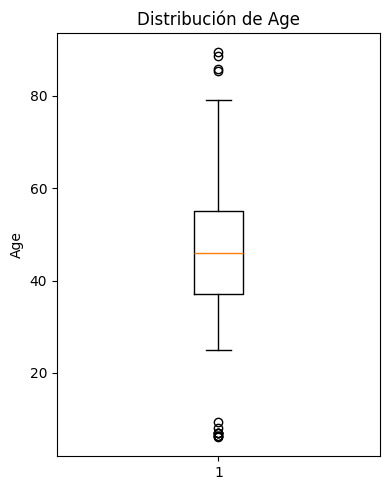

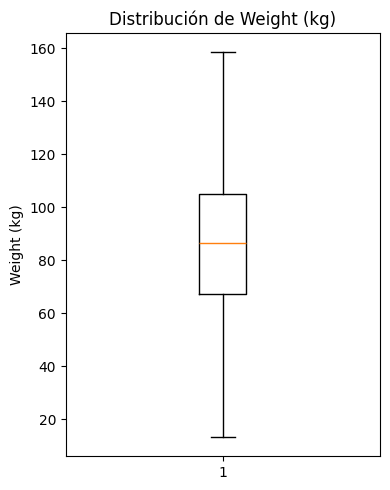

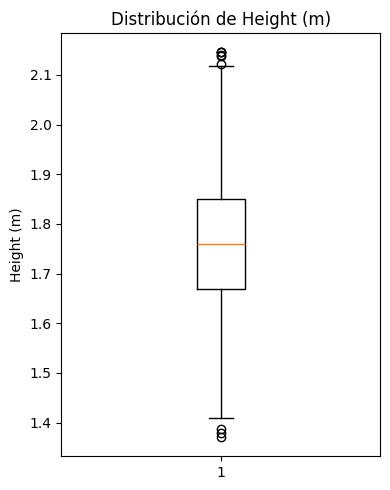

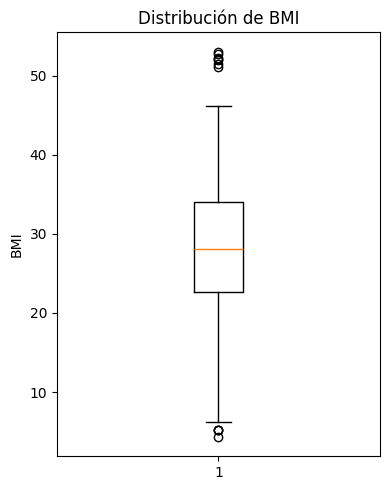

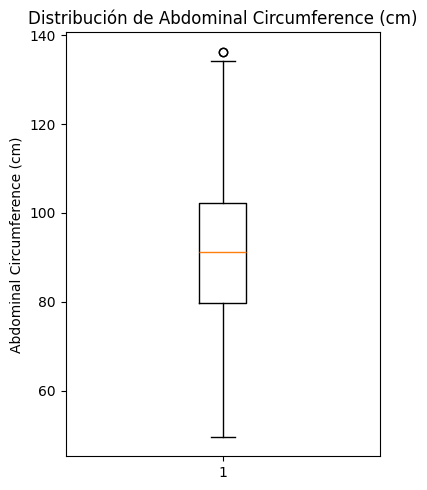

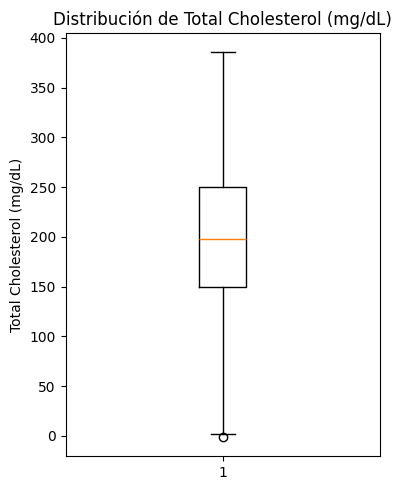

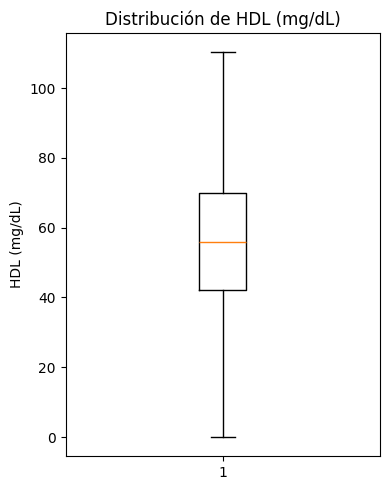

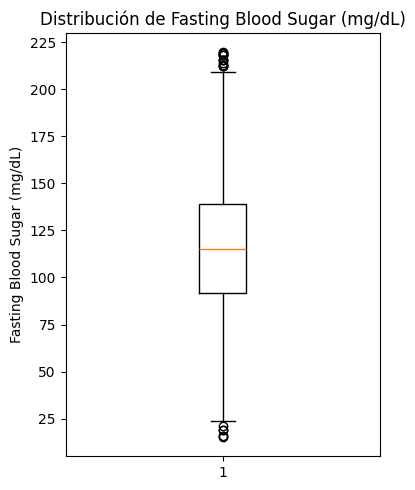

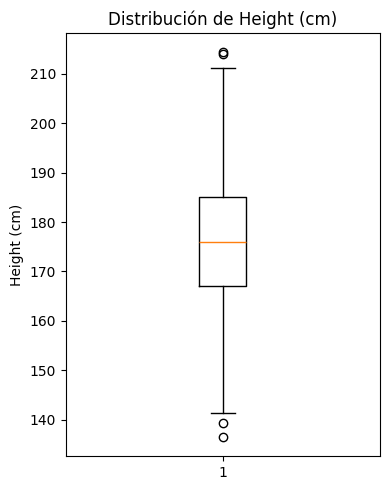

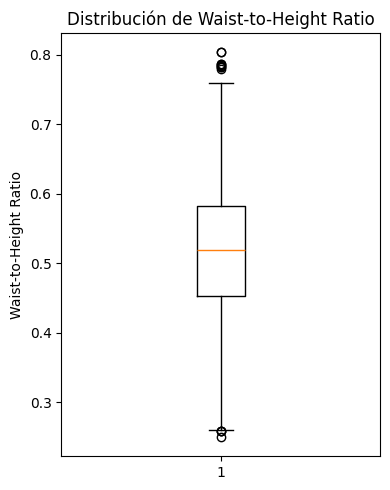

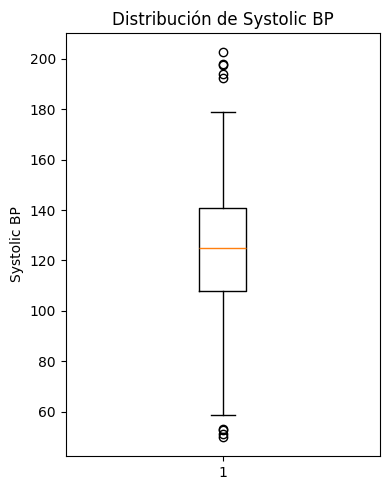

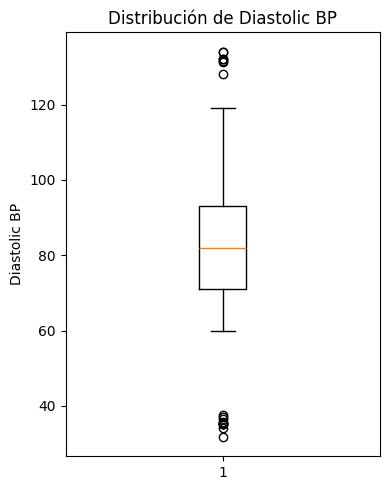

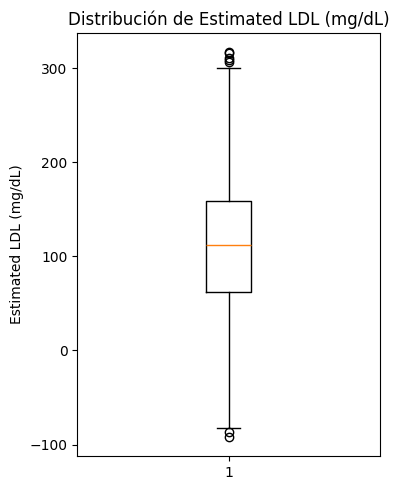

In [26]:

objetivo = "CVD Risk Score"

numericas = datos.select_dtypes(include=np.number).columns.tolist()

# quitamos el objetivo para verlo aparte
numericas_sin_objetivo = [c for c in numericas if c != objetivo]

for col in numericas_sin_objetivo:
    plt.figure(figsize=(4,5))
    plt.boxplot(datos[col].dropna())
    plt.title(f"Distribución de {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

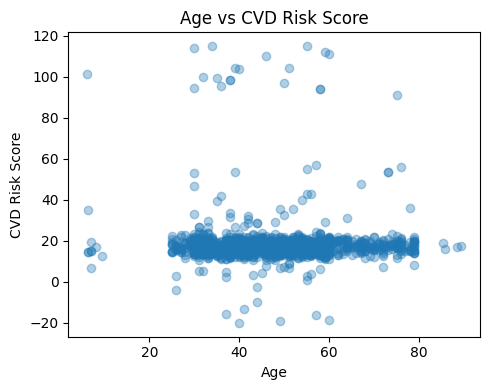

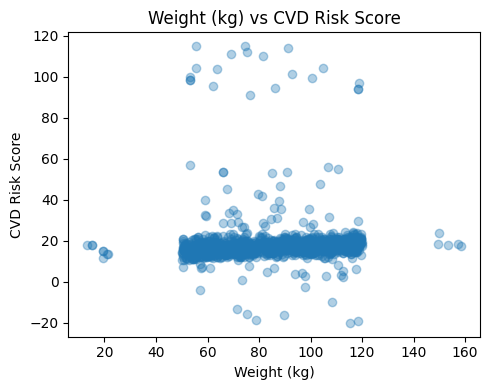

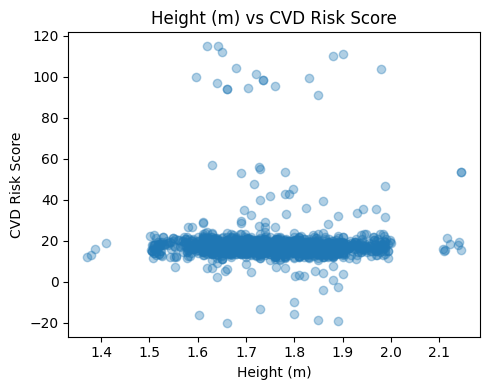

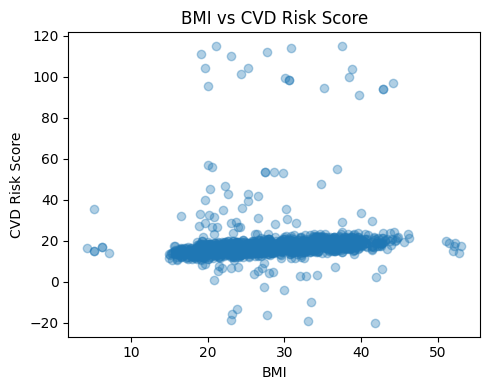

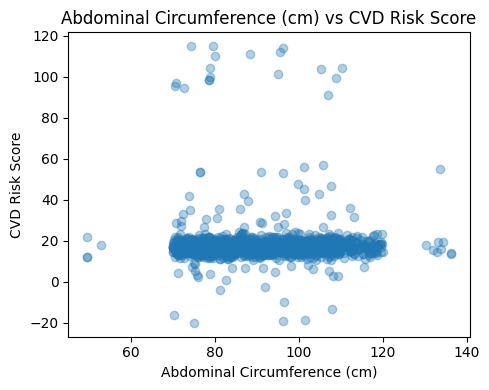

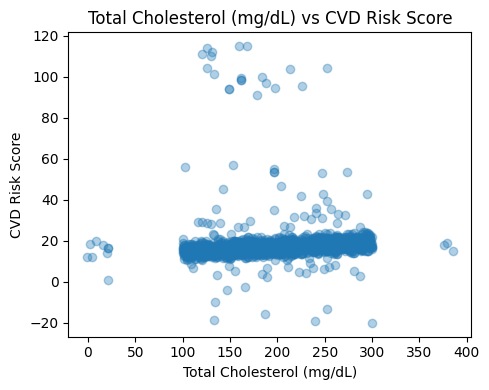

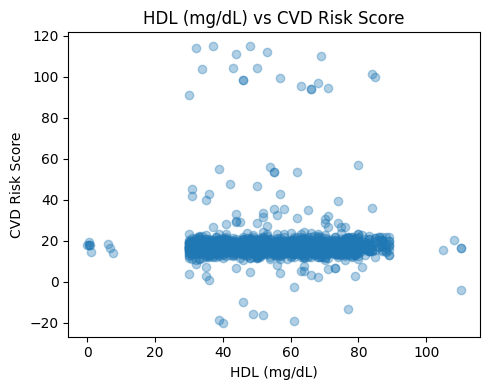

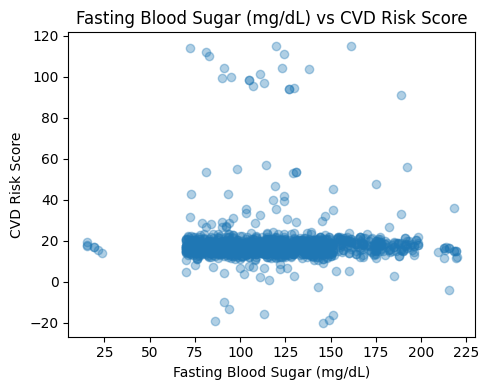

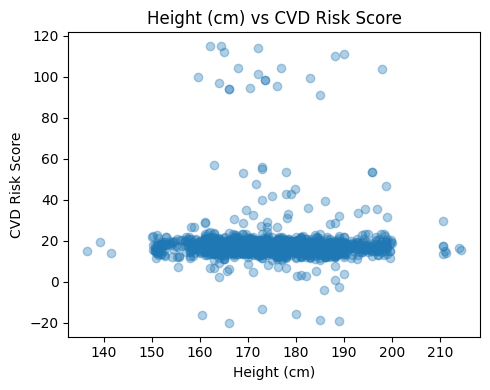

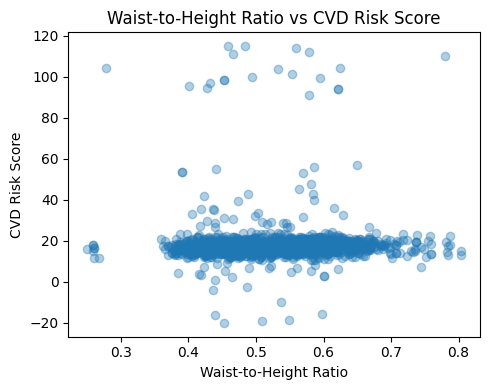

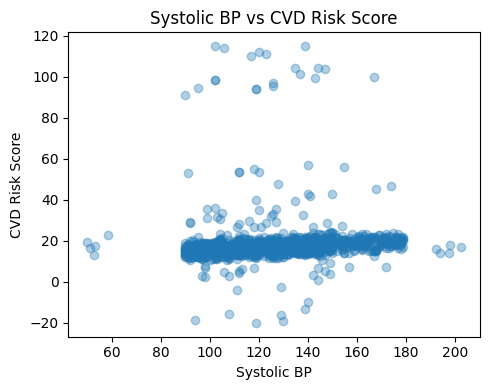

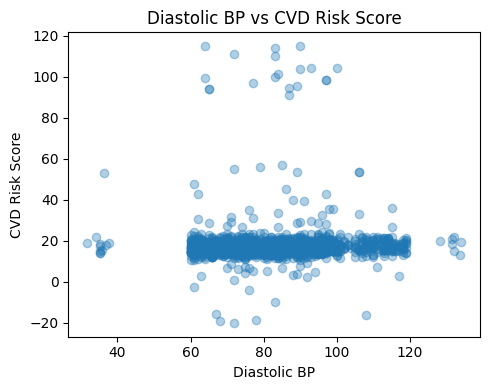

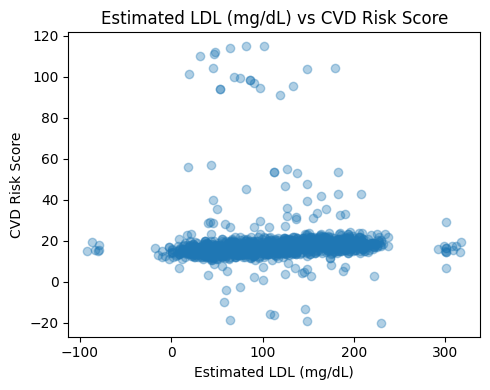

In [27]:
for col in numericas_sin_objetivo:
    plt.figure(figsize=(5,4))
    plt.scatter(datos[col], datos[objetivo], alpha=0.35)
    plt.xlabel(col)
    plt.ylabel(objetivo)
    plt.title(f"{col} vs {objetivo}")
    plt.tight_layout()
    plt.show()

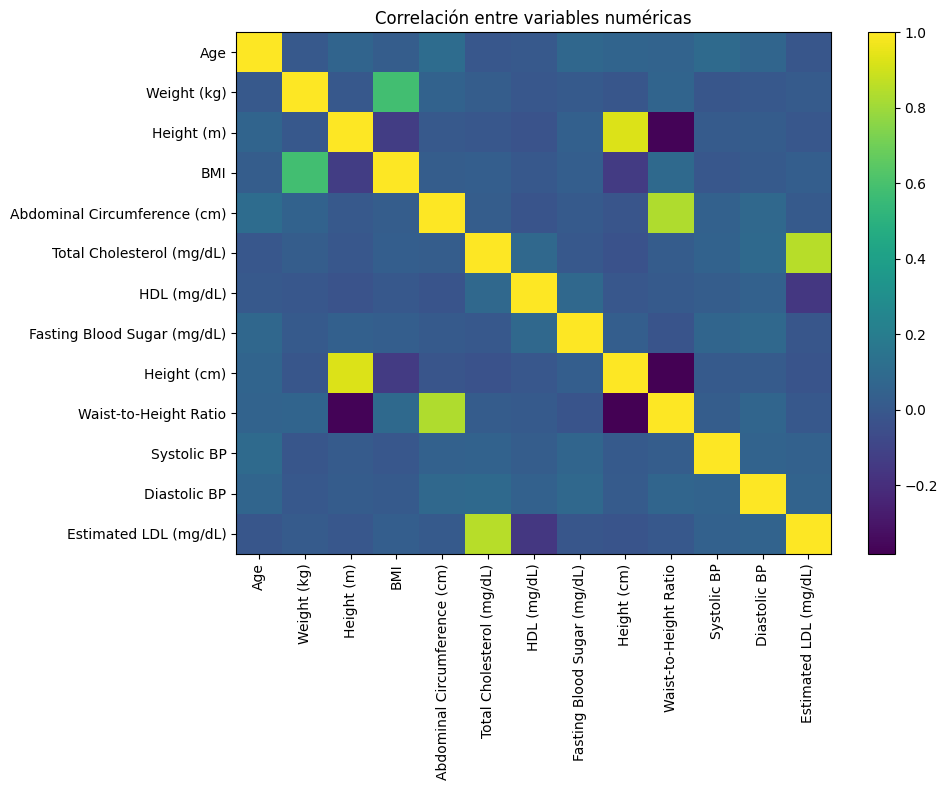

In [32]:
df = datos.copy()

# solo numéricas
numericas = df.select_dtypes(include=np.number)

# quitar el objetivo
numericas = numericas.drop(columns=["CVD Risk Score"], errors="ignore")

corr = numericas.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, aspect="auto")
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlación entre variables numéricas")
plt.tight_layout()
plt.show()

## Agrupar pacientes usando media y desviación estándar

In [28]:
df = datos.copy()
objetivo = "CVD Risk Score"

# asegurar fecha
if "Date of Service" in df.columns:
    df["Date of Service"] = pd.to_datetime(df["Date of Service"], errors="coerce")

# identificar tipos
numericas = df.select_dtypes(include=np.number).columns.tolist()
categoricas = df.select_dtypes(exclude=np.number).columns.tolist()

# quitar ID de agregaciones
numericas = [c for c in numericas if c != "Patient ID"]
categoricas = [c for c in categoricas if c != "Patient ID"]


agg = {}

for col in numericas:
    if col != objetivo:
        agg[col] = ["mean", "std"]
    else:
        agg[col] = "last"  

for col in categoricas:
    if col != "Date of Service":
        agg[col] = lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan

if "Date of Service" in df.columns:
    agg["Date of Service"] = "max"

# agrupar
df_pacientes = df.groupby("Patient ID").agg(agg)

# arreglar nombres
df_pacientes.columns = [
    f"{c[0]}_{c[1]}" if isinstance(c, tuple) else c
    for c in df_pacientes.columns
]

df_pacientes = df_pacientes.reset_index()

print("Filas originales:", df.shape[0])
print("Pacientes únicos:", df_pacientes.shape[0])
display(df_pacientes.head())

Filas originales: 1610
Pacientes únicos: 1349


,Patient ID,Age_mean,Age_std,Weight (kg)_mean,Weight (kg)_std,Height (m)_mean,Height (m)_std,BMI_mean,BMI_std,Abdominal Circumference (cm)_mean,Abdominal Circumference (cm)_std,Total Cholesterol (mg/dL)_mean,Total Cholesterol (mg/dL)_std,HDL (mg/dL)_mean,HDL (mg/dL)_std,Fasting Blood Sugar (mg/dL)_mean,Fasting Blood Sugar (mg/dL)_std,Height (cm)_mean,Height (cm)_std,Waist-to-Height Ratio_mean,Waist-to-Height Ratio_std,Systolic BP_mean,Systolic BP_std,Diastolic BP_mean,Diastolic BP_std,Estimated LDL (mg/dL)_mean,Estimated LDL (mg/dL)_std,CVD Risk Score_last,Sex_<lambda>,Blood Pressure (mmHg)_<lambda>,Smoking Status_<lambda>,Diabetes Status_<lambda>,Physical Activity Level_<lambda>,Family History of CVD_<lambda>,Blood Pressure Category_<lambda>,CVD Risk Level_<lambda>,Date of Service_max
0,AEFC1294,52.0,NaN,109.700,NaN,1.780,NaN,34.600,NaN,104.400,NaN,197.0,NaN,0.915,NaN,99.0,NaN,178.000,NaN,0.587,NaN,103.0,NaN,99.0,NaN,NaN,NaN,18.010,F,103/99,N,Y,High,N,Hypertension Stage 2,HIGH,NaT
1,AHTL6366,NaN,NaN,104.469,NaN,1.995,NaN,25.390,NaN,86.894,NaN,NaN,NaN,82.000,NaN,175.0,NaN,199.458,NaN,0.436,NaN,164.0,NaN,90.0,NaN,147.0,NaN,18.458,F,164/90,N,N,Low,Y,Hypertension Stage 2,HIGH,NaT
2,AHjK2744,58.0,NaN,NaN,NaN,1.870,NaN,33.800,NaN,99.600,NaN,106.0,NaN,6.809,NaN,115.0,NaN,187.000,NaN,0.533,NaN,NaN,NaN,91.0,NaN,33.0,NaN,16.530,M,113/91,Y,Y,Low,N,Hypertension Stage 2,HIGH,NaT
3,ALHn0227,52.0,NaN,107.800,NaN,1.780,NaN,34.000,NaN,103.500,NaN,179.0,NaN,73.000,NaN,132.0,NaN,178.000,NaN,0.581,NaN,111.0,NaN,69.0,NaN,76.0,NaN,15.930,F,111/69,N,N,Low,Y,Normal,HIGH,NaT
4,AMxU2442,57.0,NaN,116.772,NaN,1.569,NaN,34.126,NaN,90.737,NaN,254.0,NaN,60.000,NaN,177.0,NaN,156.854,NaN,0.578,NaN,117.0,NaN,116.0,NaN,164.0,NaN,17.755,M,117/116,N,N,Low,Y,Hypertension Stage 2,HIGH,2023-09-10


### Estructura del conjunto de datos

El conjunto de datos de entrenamiento contiene información demográfica, clínica y de hábitos de vida de los pacientes, junto con la variable objetivo **CVD Risk Score**, que representa el riesgo cardiovascular de forma continua.

El conjunto de datos de prueba mantiene la misma estructura, pero no incluye la variable objetivo, ya que será utilizado posteriormente para generar predicciones.

## Manejar faltantes inteligentemente
Después del std aparecerán NaN (pacientes con 1 sola visita).


In [31]:
df_limpio = df_pacientes.copy()

# desviaciones: si solo hubo una visita → std = 0
cols_std = [c for c in df_limpio.columns if c.endswith("_std")]
df_limpio[cols_std] = df_limpio[cols_std].fillna(0)

# numéricas → media global
num_cols = df_limpio.select_dtypes(include=np.number).columns
df_limpio[num_cols] = df_limpio[num_cols].fillna(df_limpio[num_cols].mean())

# categóricas → moda
cat_cols = df_limpio.select_dtypes(exclude=np.number).columns
for c in cat_cols:
    df_limpio[c] = df_limpio[c].fillna(df_limpio[c].mode()[0])

print("NaN restantes:", df_limpio.isna().sum().sum())

NaN restantes: 0


## Preparar dataset para ML

In [33]:
from sklearn.model_selection import train_test_split

target = "CVD Risk Score_last"

X = df_limpio.drop(columns=[target, "Patient ID"], errors="ignore")
y = df_limpio[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

(1079, 35) (270, 35)


# Datos faltantes
Verificamos los datos faltantes en el dataset como estaba originalmente.

In [34]:
# =========================
# Faltantes (dataset crudo)
# =========================
faltantes = datos.isna().sum().sort_values(ascending=False)
porc_faltantes = (datos.isna().mean() * 100).sort_values(ascending=False)

print("Faltantes (crudo) - top 15")
display(faltantes.head(15))

print("% faltantes (crudo) - top 15")
display(porc_faltantes.head(15))

# =========================
# Duplicados de filas exactas
# =========================
duplicados_filas = datos.duplicated().sum()
print("Duplicados filas exactas (crudo):", duplicados_filas)

# =========================
# Duplicados de Patient ID
# =========================
if "Patient ID" in datos.columns:
    duplicados_id = datos["Patient ID"].duplicated().sum()
    print("Patient ID duplicado (crudo):", duplicados_id)

    # Extra: cuántas filas por paciente (top 15)
    conteo_por_id = datos["Patient ID"].value_counts()
    print("\nPacientes con más registros (top 15):")
    display(conteo_por_id.head(15))

Faltantes (crudo) - top 15


Date of Service                 1275
Diastolic BP                      83
HDL (mg/dL)                       82
Waist-to-Height Ratio             76
Weight (kg)                       72
Height (cm)                       68
Total Cholesterol (mg/dL)         68
Age                               67
Systolic BP                       60
Height (m)                        60
Abdominal Circumference (cm)      59
Estimated LDL (mg/dL)             57
Fasting Blood Sugar (mg/dL)       53
BMI                               51
Blood Pressure Category            0
dtype: int64

% faltantes (crudo) - top 15


Date of Service                 79.192547
Diastolic BP                     5.155280
HDL (mg/dL)                      5.093168
Waist-to-Height Ratio            4.720497
Weight (kg)                      4.472050
Height (cm)                      4.223602
Total Cholesterol (mg/dL)        4.223602
Age                              4.161491
Systolic BP                      3.726708
Height (m)                       3.726708
Abdominal Circumference (cm)     3.664596
Estimated LDL (mg/dL)            3.540373
Fasting Blood Sugar (mg/dL)      3.291925
BMI                              3.167702
Blood Pressure Category          0.000000
dtype: float64

Duplicados filas exactas (crudo): 150
Patient ID duplicado (crudo): 261

Pacientes con más registros (top 15):


Patient ID
oSqq7069    3
gBFe4249    3
AhYt1346    3
RlsB8509    3
RwGu5647    3
fHqx3420    3
YLCe2926    3
dSiv4949    3
pEpZ9034    3
STpP5810    3
DhUJ7239    3
FTEC4446    3
xbYu9929    3
tCaB2910    3
xFVW5778    3
Name: count, dtype: int64

## Verificamos que ahora con lso cambios como estamos de faltantes y duplocados

In [35]:
# =========================
# Faltantes (por paciente)
# =========================
faltantes_p = df_limpio.isna().sum().sort_values(ascending=False)
porc_faltantes_p = (df_limpio.isna().mean() * 100).sort_values(ascending=False)

print("Faltantes (por paciente) - top 15")
display(faltantes_p.head(15))

print("% faltantes (por paciente) - top 15")
display(porc_faltantes_p.head(15))

# =========================
# Duplicados (ya no deberían existir)
# =========================
duplicados_filas_p = df_limpio.duplicated().sum()
print("Duplicados filas exactas (por paciente):", duplicados_filas_p)

if "Patient ID" in df_limpio.columns:
    duplicados_id_p = df_limpio["Patient ID"].duplicated().sum()
    print("Patient ID duplicado (por paciente):", duplicados_id_p)

Faltantes (por paciente) - top 15


Patient ID                          0
Waist-to-Height Ratio_mean          0
Systolic BP_mean                    0
Systolic BP_std                     0
Diastolic BP_mean                   0
Diastolic BP_std                    0
Estimated LDL (mg/dL)_mean          0
Estimated LDL (mg/dL)_std           0
CVD Risk Score_last                 0
Sex_<lambda>                        0
Blood Pressure (mmHg)_<lambda>      0
Smoking Status_<lambda>             0
Diabetes Status_<lambda>            0
Physical Activity Level_<lambda>    0
Family History of CVD_<lambda>      0
dtype: int64

% faltantes (por paciente) - top 15


Patient ID                          0.0
Waist-to-Height Ratio_mean          0.0
Systolic BP_mean                    0.0
Systolic BP_std                     0.0
Diastolic BP_mean                   0.0
Diastolic BP_std                    0.0
Estimated LDL (mg/dL)_mean          0.0
Estimated LDL (mg/dL)_std           0.0
CVD Risk Score_last                 0.0
Sex_<lambda>                        0.0
Blood Pressure (mmHg)_<lambda>      0.0
Smoking Status_<lambda>             0.0
Diabetes Status_<lambda>            0.0
Physical Activity Level_<lambda>    0.0
Family History of CVD_<lambda>      0.0
dtype: float64

Duplicados filas exactas (por paciente): 0
Patient ID duplicado (por paciente): 0


## Graficamos de nuevo todo para poder ver el cabio en el dataset y ver si ya esta listo para el modelo

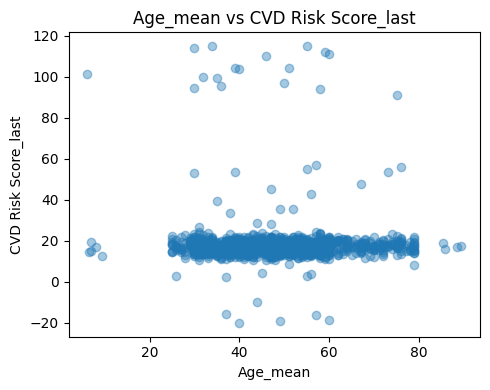

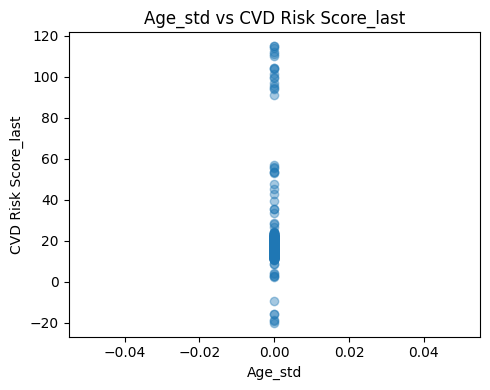

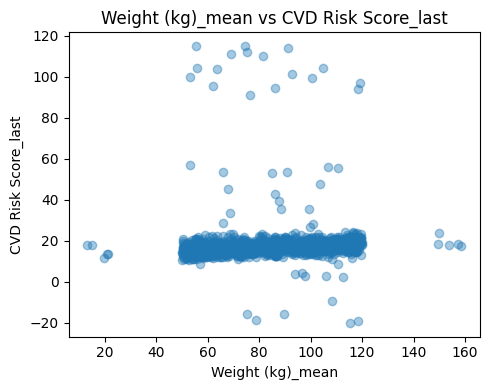

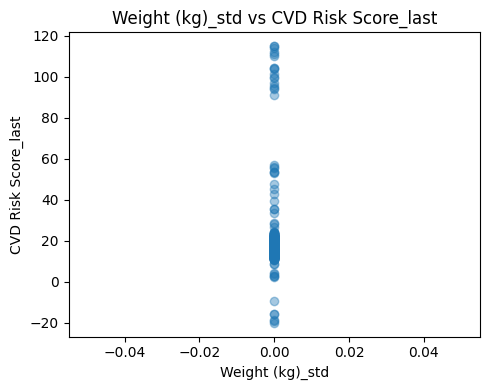

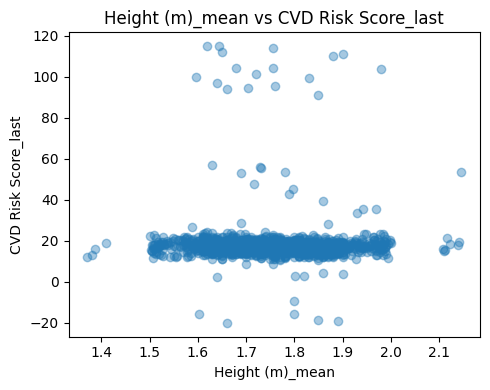

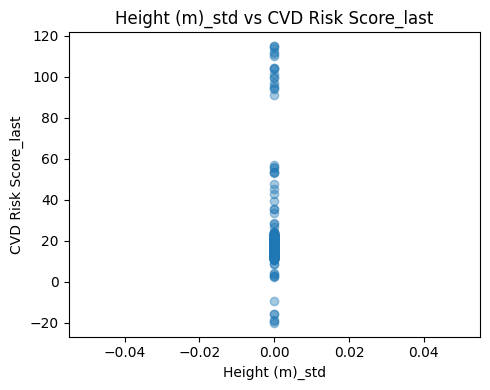

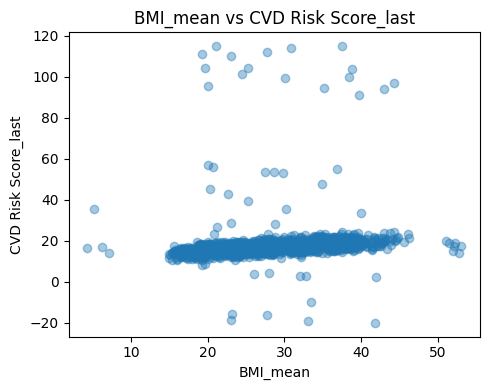

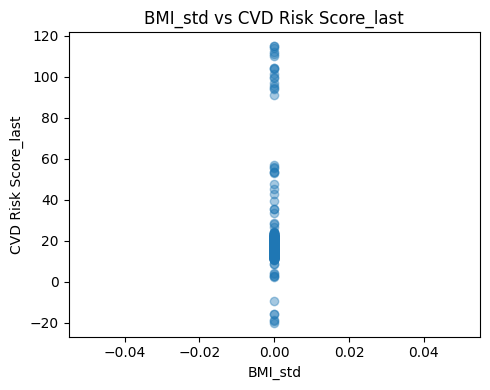

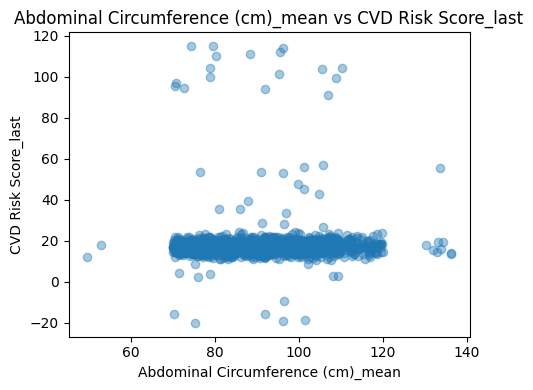

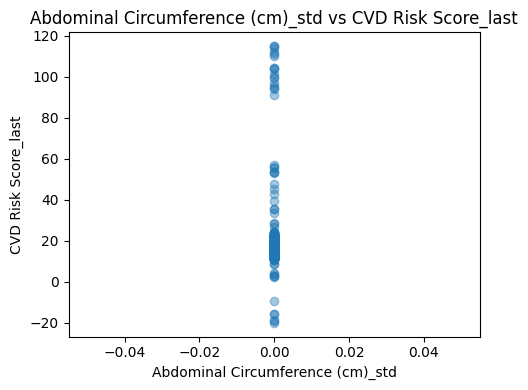

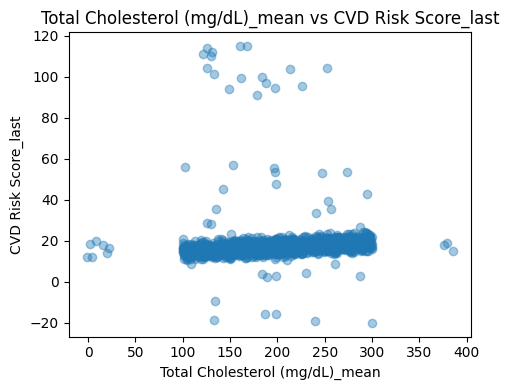

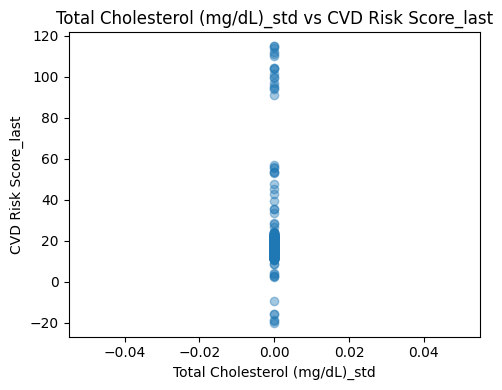

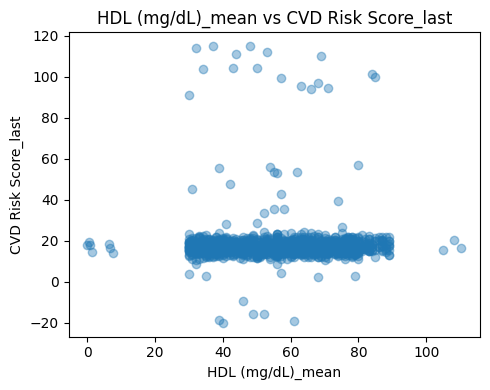

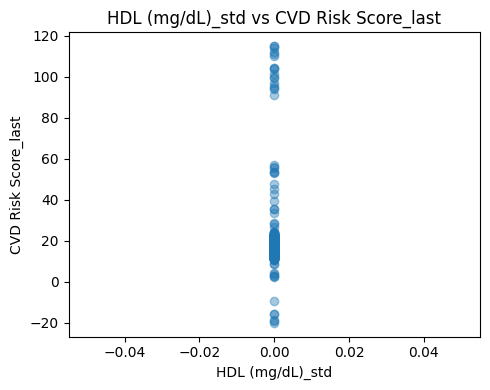

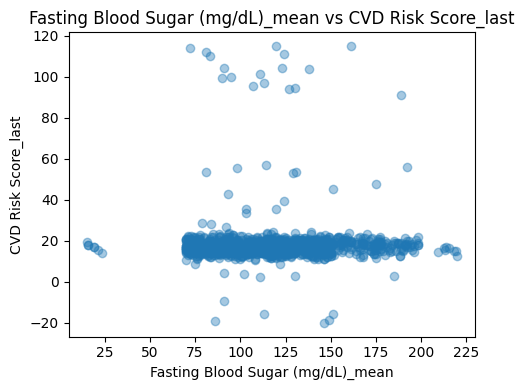

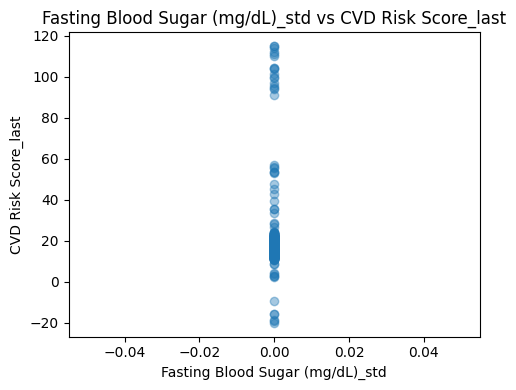

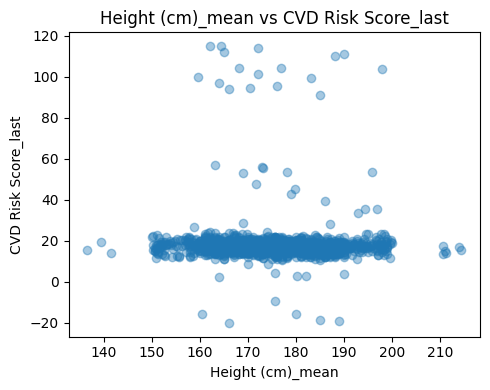

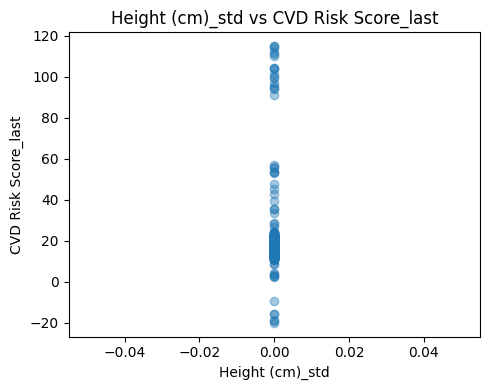

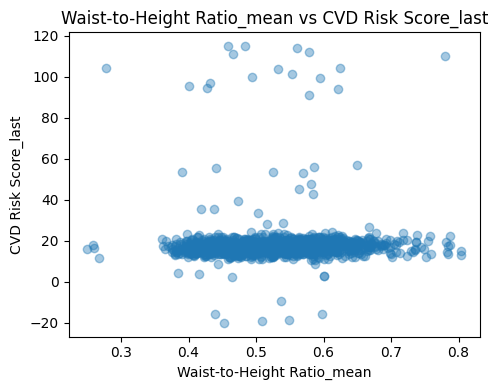

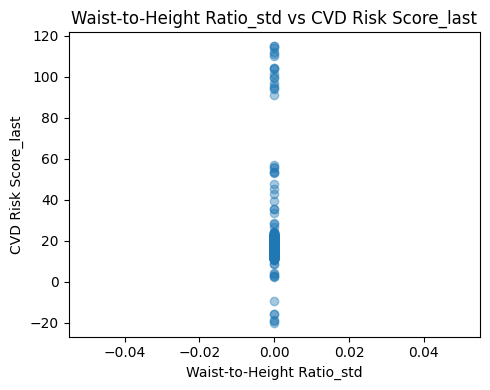

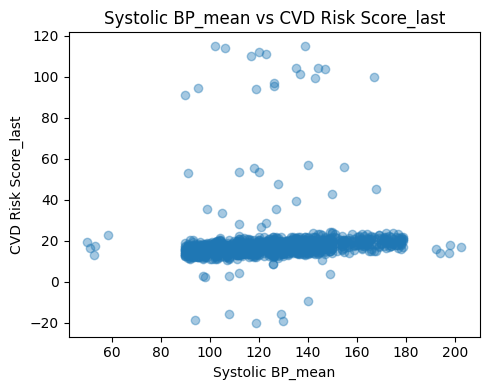

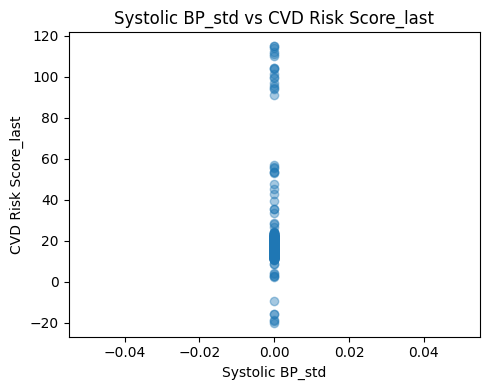

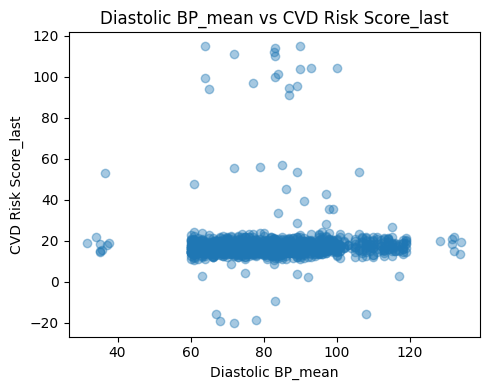

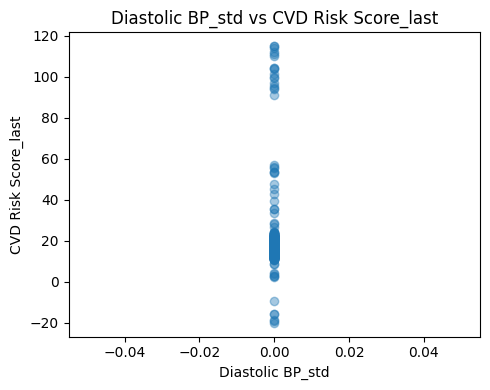

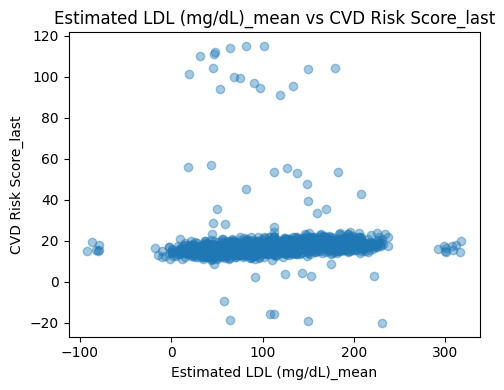

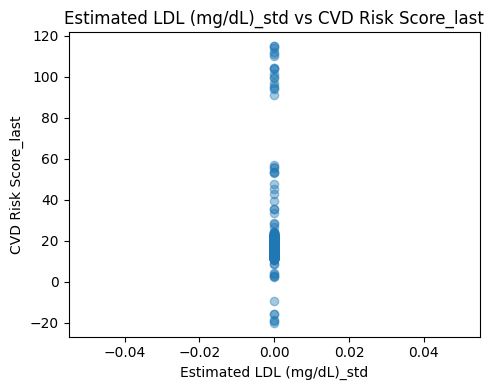

In [37]:

df = df_limpio.copy()
objetivo = "CVD Risk Score_last"

# separar tipos
numericas = df.select_dtypes(include=np.number).columns.tolist()
numericas = [c for c in numericas if c != objetivo]

categoricas = df.select_dtypes(exclude=np.number).columns.tolist()
for col in numericas:
    plt.figure(figsize=(5,4))
    plt.scatter(df[col], df[objetivo], alpha=0.4)
    plt.xlabel(col)
    plt.ylabel(objetivo)
    plt.title(f"{col} vs {objetivo}")
    plt.tight_layout()
    plt.show()

# Miramos ahora la variable que tenemos como objetivo

Resumen objetivo:


count    1349.000000
mean       18.145317
std        10.752150
min       -20.057000
25%        15.150000
50%        16.910000
75%        18.791000
max       114.980000
Name: CVD Risk Score_last, dtype: float64

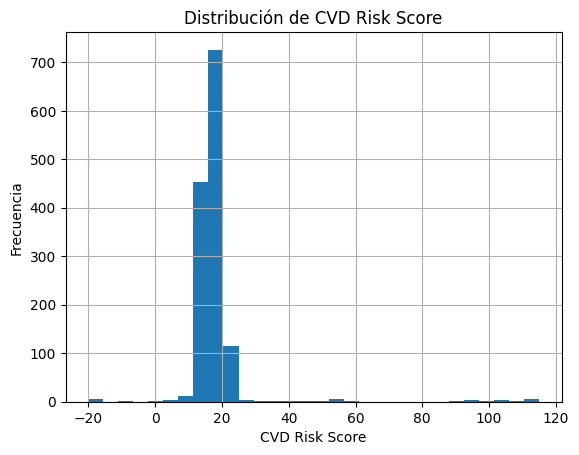

In [40]:
# Solo esta en los datos de train
objetivo = "CVD Risk Score_last"

print("Resumen objetivo:")
display(df_limpio[objetivo].describe())

# La graficamos en barras
plt.figure()
df_limpio[objetivo].hist(bins=30)
plt.title("Distribución de CVD Risk Score")
plt.xlabel("CVD Risk Score")
plt.ylabel("Frecuencia")
plt.show()

### Variable objetivo: CVD Risk Score

La distribución de la variable objetivo permite evaluar su rango, dispersión y posible presencia de valores atípicos.  
Este análisis es importante para verificar si la regresión lineal es un modelo razonable para aproximar la relación entre las variables predictoras y el riesgo cardiovascular.

# conteos de variables categóricas
para entender calidad de los datos

In [41]:
categoricas = [
    "Sex", "Smoking Status", "Diabetes Status",
    "Physical Activity Level", "Family History of CVD",
    "Blood Pressure Category", "CVD Risk Level"
]

for col in categoricas:
    if col in df_limpio.columns:
        print(f"\n=== {col} (train) ===")
        display(df_limpio[col].value_counts(dropna=False))

### Variables categóricas

Se analizan las frecuencias de las variables categóricas con el fin de identificar posibles desbalances entre categorías.  
Esta información será relevante para decidir el tipo de codificación a utilizar durante la preparación de los datos.

### Conclusiones de la exploración

La exploración de los datos permitió identificar la estructura del conjunto de datos, la presencia de valores faltantes, la distribución de la variable objetivo y el comportamiento de las variables categóricas.  

Con base en estos hallazgos, en la siguiente sección se realizarán las decisiones de limpieza, transformación y preparación de los datos necesarias para la construcción de los modelos de regresión lineal.

### 2. Preparación de los datos 

En esta sección se realizan las transformaciones necesarias para preparar los datos antes del entrenamiento de los modelos de regresión lineal.  
Las decisiones tomadas se justifican con base en los resultados obtenidos durante la exploración.

## Eliminacion de datos duplicados
Con base en la exploración realizada, se identificaron registros duplicados en el conjunto de datos.
Dado que estos registros no aportan nueva información y pueden sesgar el entrenamiento del modelo, se decide eliminarlos del conjunto de entrenamiento.

In [42]:
duplicados_filas_test = df_limpio.duplicated().sum()
print("las filas duplicadas son:", duplicados_filas_test)
df_limpio = df_limpio.drop_duplicates()
print("el numero de filas despues de eliminar duplicados es:", df_limpio.shape[0])
# Duplicados por Patient ID (si existe la columna)
if "Patient ID" in df_limpio.columns:
    duplicados_id = df_limpio["Patient ID"].duplicated().sum()
    print(f"Patient ID duplicados: {duplicados_id}")

las filas duplicadas son: 0
el numero de filas despues de eliminar duplicados es: 1349
Patient ID duplicados: 0


## Separar la variable objetico y las predictorias
Se define **CVD Risk Score** como variable objetivo, al ser una variable continua que representa el riesgo cardiovascular.  
Las demás variables se utilizan como predictores.

In [44]:
objetivo = "CVD Risk Score_last"
datos_entrenamiento = df_limpio.dropna(subset=[objetivo])
X = datos_entrenamiento.drop(columns=[objetivo, "CVD Risk Level"], errors="ignore")
y = datos_entrenamiento[objetivo]
print(y.isna().sum())
print(X.shape)
print(y.shape)
X.head()

0
(1349, 36)
(1349,)


,Patient ID,Age_mean,Age_std,Weight (kg)_mean,Weight (kg)_std,Height (m)_mean,Height (m)_std,BMI_mean,BMI_std,Abdominal Circumference (cm)_mean,Abdominal Circumference (cm)_std,Total Cholesterol (mg/dL)_mean,Total Cholesterol (mg/dL)_std,HDL (mg/dL)_mean,HDL (mg/dL)_std,Fasting Blood Sugar (mg/dL)_mean,Fasting Blood Sugar (mg/dL)_std,Height (cm)_mean,Height (cm)_std,Waist-to-Height Ratio_mean,Waist-to-Height Ratio_std,Systolic BP_mean,Systolic BP_std,Diastolic BP_mean,Diastolic BP_std,Estimated LDL (mg/dL)_mean,Estimated LDL (mg/dL)_std,Sex_<lambda>,Blood Pressure (mmHg)_<lambda>,Smoking Status_<lambda>,Diabetes Status_<lambda>,Physical Activity Level_<lambda>,Family History of CVD_<lambda>,Blood Pressure Category_<lambda>,CVD Risk Level_<lambda>,Date of Service_max
0,AEFC1294,52.000000,0.0,109.700000,0.0,1.780,0.0,34.600,0.0,104.400,0.0,197.000000,0.0,0.915,0.0,99.0,0.0,178.000,0.0,0.587,0.0,103.000000,0.0,99.0,0.0,112.162273,0.0,F,103/99,N,Y,High,N,Hypertension Stage 2,HIGH,2025-12-05
1,AHTL6366,47.073449,0.0,104.469000,0.0,1.995,0.0,25.390,0.0,86.894,0.0,198.089231,0.0,82.000,0.0,175.0,0.0,199.458,0.0,0.436,0.0,164.000000,0.0,90.0,0.0,147.000000,0.0,F,164/90,N,N,Low,Y,Hypertension Stage 2,HIGH,2025-12-05
2,AHjK2744,58.000000,0.0,86.011385,0.0,1.870,0.0,33.800,0.0,99.600,0.0,106.000000,0.0,6.809,0.0,115.0,0.0,187.000,0.0,0.533,0.0,125.759492,0.0,91.0,0.0,33.000000,0.0,M,113/91,Y,Y,Low,N,Hypertension Stage 2,HIGH,2025-12-05
3,ALHn0227,52.000000,0.0,107.800000,0.0,1.780,0.0,34.000,0.0,103.500,0.0,179.000000,0.0,73.000,0.0,132.0,0.0,178.000,0.0,0.581,0.0,111.000000,0.0,69.0,0.0,76.000000,0.0,F,111/69,N,N,Low,Y,Normal,HIGH,2025-12-05
4,AMxU2442,57.000000,0.0,116.772000,0.0,1.569,0.0,34.126,0.0,90.737,0.0,254.000000,0.0,60.000,0.0,177.0,0.0,156.854,0.0,0.578,0.0,117.000000,0.0,116.0,0.0,164.000000,0.0,M,117/116,N,N,Low,Y,Hypertension Stage 2,HIGH,2023-09-10


### División entrenamiento y prueba

Con el fin de evaluar el desempeño de los modelos de regresión lineal sobre datos no vistos, el conjunto de datos se divide en entrenamiento y prueba.  
Se utiliza un 25% de los datos para el conjunto de prueba y una semilla fija para garantizar la reproducibilidad de los resultados.

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)
print("NaN en y_train:", y_train.isna().sum())
print("NaN en y_test :", y_test.isna().sum())

X_train: (1011, 36)
X_test : (338, 36)
y_train: (1011,)
y_test : (338,)
NaN en y_train: 0
NaN en y_test : 0


## Identificar variables numericas y categóricas

vamos a revisara los tipos de variables de la base de datos

In [46]:
cl_numericas = X_train.select_dtypes(include=np.number).columns.tolist()
cl_categoricas = X_train.select_dtypes(exclude=np.number).columns.tolist()

print("El numero de variables numerias es: ", len(cl_numericas))
print("El numero de variables categoricas es: ", len(cl_categoricas))

print(cl_numericas)
print(cl_categoricas)

El numero de variables numerias es:  26
El numero de variables categoricas es:  10
['Age_mean', 'Age_std', 'Weight (kg)_mean', 'Weight (kg)_std', 'Height (m)_mean', 'Height (m)_std', 'BMI_mean', 'BMI_std', 'Abdominal Circumference (cm)_mean', 'Abdominal Circumference (cm)_std', 'Total Cholesterol (mg/dL)_mean', 'Total Cholesterol (mg/dL)_std', 'HDL (mg/dL)_mean', 'HDL (mg/dL)_std', 'Fasting Blood Sugar (mg/dL)_mean', 'Fasting Blood Sugar (mg/dL)_std', 'Height (cm)_mean', 'Height (cm)_std', 'Waist-to-Height Ratio_mean', 'Waist-to-Height Ratio_std', 'Systolic BP_mean', 'Systolic BP_std', 'Diastolic BP_mean', 'Diastolic BP_std', 'Estimated LDL (mg/dL)_mean', 'Estimated LDL (mg/dL)_std']
['Patient ID', 'Sex_<lambda>', 'Blood Pressure (mmHg)_<lambda>', 'Smoking Status_<lambda>', 'Diabetes Status_<lambda>', 'Physical Activity Level_<lambda>', 'Family History of CVD_<lambda>', 'Blood Pressure Category_<lambda>', 'CVD Risk Level_<lambda>', 'Date of Service_max']


Tratamiento de valores faltantes (imputación)

Con base en el análisis de valores faltantes de la Actividad 1, se define una estrategia de imputación para conservar la mayor cantidad de información posible.  
- Para variables **numéricas**, se utiliza la **mediana** (robusta ante valores atípicos).  
- Para variables **categóricas**, se utiliza la **moda** (valor más frecuente).  

Estas transformaciones se integrarán posteriormente dentro de pipelines para evitar fuga de información y garantizar consistencia.

In [47]:
from sklearn.impute import SimpleImputer

imputador_numerico = SimpleImputer(strategy="median")
imputador_categorico = SimpleImputer(strategy="most_frequent")

print("Los imputadores de datos son: ")
print("Imputador numérico:", imputador_numerico)
print("Imputador categórico:", imputador_categorico)

Los imputadores de datos son: 
Imputador numérico: SimpleImputer(strategy='median')
Imputador categórico: SimpleImputer(strategy='most_frequent')


### Codificación de variables categóricas

Para que el modelo de regresión lineal pueda trabajar con variables categóricas, estas se transforman a variables numéricas mediante **one-hot encoding**.  

- Se usa `drop="first"` para eliminar una categoría de referencia y reducir riesgo de multicolinealidad.  
- Se usa `handle_unknown="ignore"` para evitar errores si en test aparecen categorías no vistas en entrenamiento.  

La codificación se integrará dentro de pipelines para garantizar que el mismo preprocesamiento se aplique durante entrenamiento y evaluación.

In [48]:
from sklearn.preprocessing import OneHotEncoder

codificador_categorico = OneHotEncoder(handle_unknown="ignore", drop="first")
print("Codificador categórico definido: ", codificador_categorico)

Codificador categórico definido:  OneHotEncoder(drop='first', handle_unknown='ignore')


### Escalamiento de variables numéricas

Se realiza el escalamiento de las variables numéricas para llevarlas a una escala comparable y facilitar el entrenamiento del modelo.  
Se utiliza `StandardScaler`, que centra los datos en 0 y los escala a desviación estándar 1.

Este paso se integrará dentro de pipelines para evitar fuga de información (el escalador se ajusta solo con train).

In [49]:
from sklearn.preprocessing import StandardScaler

escalador_numerico = StandardScaler()

print("Escalador numérico definido: StandardScaler()")

Escalador numérico definido: StandardScaler()


### Construcción del preprocesador 

Se construye un preprocesador que aplica transformaciones distintas según el tipo de variable:

- **Numéricas:** imputación (mediana) + escalamiento (StandardScaler)  
- **Categóricas:** imputación (moda) + one-hot encoding  

Este preprocesador será reutilizado dentro de pipelines para entrenar y evaluar modelos de forma consistente.

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

pipeline_numerico = Pipeline(steps=[
    ("imputacion", imputador_numerico),
    ("escalamiento", escalador_numerico)
])

# Pipeline para categóricas
pipeline_categorico = Pipeline(steps=[
    ("imputacion", imputador_categorico),
    ("onehot", codificador_categorico)
])

# Preprocesador final
preprocesador = ColumnTransformer(
    transformers=[
        ("num", pipeline_numerico, cl_numericas),
        ("cat", pipeline_categorico, cl_categoricas)
    ],
    remainder="drop"
)


## Construcción de modelos de regresión lineal 

En esta sección se construyen al menos dos modelos de regresión lineal utilizando **pipelines**, integrando el preprocesamiento definido anteriormente.  
Los modelos se entrenan sobre el conjunto de entrenamiento y se evalúan inicialmente con **RMSE** sobre el conjunto de prueba.

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluar_modelo(nombre_modelo, modelo, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)

    rmse = mean_squared_error(y_test, pred) ** 0.5
    mae  = mean_absolute_error(y_test, pred)
    r2   = r2_score(y_test, pred)

    print(f"{nombre_modelo} -> RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {r2:.4f}")
    return {"Modelo": nombre_modelo, "RMSE": rmse, "MAE": mae, "R2": r2}

### Modelo 1 — Regresión lineal (baseline)

Se construye un modelo base de regresión lineal utilizando el preprocesador definido (imputación + escalamiento + one-hot encoding).  
Este modelo sirve como referencia para comparar mejoras con otras estrategias.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

modelo_1 = Pipeline(steps=[
    ("preprocesamiento", preprocesador),
    ("modelo", LinearRegression())
])

resultados = []
resultados.append(evaluar_modelo("Modelo 1 - LinearRegression", modelo_1, X_train, y_train, X_test, y_test))

Modelo 1 - LinearRegression -> RMSE: 8.2110 | MAE: 3.3103 | R2: -0.0303


/Users/danieldiab/.pyenv/versions/3.13.2/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [0, 2, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


**Interpretación (Modelo 1):**  
El modelo base obtiene un **RMSE = 11.1841** y **MAE = 4.2860**, lo que indica un error promedio de magnitud moderada en las predicciones (en unidades de *CVD Risk Score*).  
El **R² = -0.0745** sugiere que el modelo, en el conjunto de prueba, **no logra explicar la variabilidad del objetivo** y su desempeño es **peor que un predictor trivial** que siempre predice el promedio del conjunto de entrenamiento.  
Este resultado motiva comparar con estrategias alternativas (por ejemplo, regularización) para evaluar si mejora la generalización.

### Modelo 2 — Regresión Ridge (regularización L2)

Se construye un segundo modelo de regresión lineal utilizando Ridge, el cual incorpora un término de regularización L2.  
Esta estrategia permite controlar la magnitud de los coeficientes y mejorar la capacidad de generalización del modelo.

In [54]:
from sklearn.linear_model import Ridge

modelo_2 = Pipeline(steps=[
    ("preprocesamiento", preprocesador),
    ("modelo", Ridge(alpha=1.0, random_state=42))
])

resultados.append(
    evaluar_modelo(
        "Modelo 2 - Ridge (alpha=1.0)",
        modelo_2,
        X_train,
        y_train,
        X_test,
        y_test
    )
)

Modelo 2 - Ridge (alpha=1.0) -> RMSE: 8.1413 | MAE: 3.2368 | R2: -0.0129


/Users/danieldiab/.pyenv/versions/3.13.2/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [0, 2, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


**Interpretación (Modelo 2):**  
El modelo Ridge obtiene **RMSE = 10.9783** y **MAE = 4.0985**, mostrando una **mejora leve** frente al modelo base en ambas métricas.  
El **R² = -0.0354** sigue siendo negativo, por lo que el modelo aún **no explica adecuadamente** la variación del objetivo en el conjunto de prueba; sin embargo, al ser menos negativo que el del baseline, su ajuste relativo es ligeramente mejor.  
En conjunto, la regularización L2 aporta una mejora pequeña, por lo que se requiere una comparación formal en una tabla y eventualmente explorar hiperparámetros (alpha) o ingeniería de características.